In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv("./data/StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop("math score", axis=1)

In [8]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df["math score"]

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [12]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [23]:
for x in X.columns:
    if X[x].dtype != int:
        print(x, " : " ,X[x].unique())

gender  :  ['female' 'male']
race/ethnicity  :  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch  :  ['standard' 'free/reduced']
test preparation course  :  ['none' 'completed']


In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [25]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [29]:
X = preprocessor.fit_transform(X)

In [31]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [34]:
X_train.shape

(800, 19)

In [ ]:
def evaluationFunction(y_test, y_pred):
    print("r2_score : ", r2_score(y_test, y_pred))
    print("mean_absolute_error : ", mean_absolute_error(y_test, y_pred))
    print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
    print("root_mean_sqaured_error", root_mean_squared_error(y_test, y_pred))

In [54]:
from sklearn.metrics import root_mean_squared_error, r2_score
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    print("Evaluation Of Training Data for model : ", list(models.keys())[i])
    evaluationFunction(y_train, y_train_pred)

    print("Evaluation Of Test Data")
    evaluationFunction(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])
    r2_list.append(r2_score(y_test, y_test_pred))


Evaluation Of Training Data for model :  Linear Regression
r2_score :  0.8562503455164387
mean_absolute_error :  4.266711846071957
mean_squared_error :  28.334870380648585
root_mean_sqaured_error 5.323050852720513
Evaluation Of Test Data
r2_score :  0.8670435914705478
mean_absolute_error :  4.214763142474851
mean_squared_error :  29.095169866715494
root_mean_sqaured_error 5.393993869732843
Evaluation Of Training Data for model :  Lasso
r2_score :  0.6903948906164421
mean_absolute_error :  5.206302661246526
mean_squared_error :  43.47840400585577
root_mean_sqaured_error 6.593815587795565
Evaluation Of Test Data
r2_score :  0.7275365655025171
mean_absolute_error :  5.157881810347763
mean_squared_error :  42.5064168384116
root_mean_sqaured_error 6.519694535667419
Evaluation Of Training Data for model :  Ridge
r2_score :  0.8557734008261901
mean_absolute_error :  4.264987823725983
mean_squared_error :  28.33778823308244
root_mean_sqaured_error 5.323324922741654
Evaluation Of Test Data
r2_s

In [55]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ["modelName", "r2_score"]).sort_values(by=["r2_score"], ascending=False)

,modelName,r2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853497
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.844772
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783681
4,Decision Tree,0.741677


In [56]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


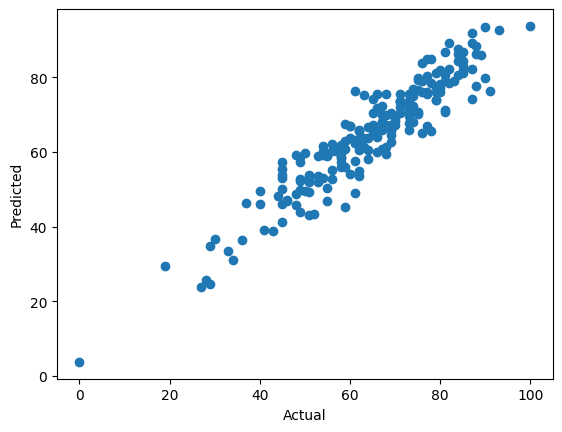

In [57]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

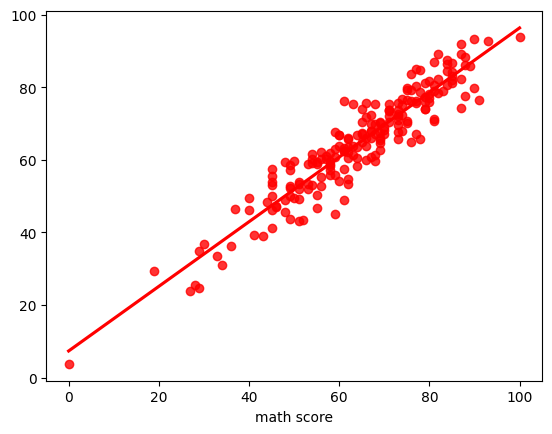

In [58]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [59]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
